#### KNN

Given that we found out in the EDA that there is a strong correlation between the Center RGB pixel and the cluster id, can we make a simple baseline ML model?

This KNN will provide us with some insights of what range of accuracy we should be able to get relatively easily using other advanced ML techniques

In [13]:
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder

##### Feature Extraction

In [ ]:
def extract_center_rgb(csv_file):
    df = pd.read_csv(csv_file)
    data = []
    for _, row in df.iterrows():
        img = Image.open(row["filepath"]).convert("RGB")
        img_np = np.array(img)
        h, w, _ = img_np.shape
        center = img_np[h//2, w//2]
        data.append((center[0], center[1], center[2], row["label"]))
    return pd.DataFrame(data, columns=["R", "G", "B", "label"])

train_rgb = extract_center_rgb("splits/train.csv")
val_rgb = extract_center_rgb("splits/val.csv")

##### Transform Data

In [14]:
le = LabelEncoder()
y_train = le.fit_transform(train_rgb["label"])
y_val = le.transform(val_rgb["label"])

X_train = train_rgb[["R", "G", "B"]].values / 255.0
X_val = val_rgb[["R", "G", "B"]].values / 255.0

##### Evaluate

kNN Accuracy on full Val set: 0.98533
Classification Report (Full Val set):
              precision    recall  f1-score   support

           a    0.97255   0.99200   0.98218       500
           b    0.99177   0.96400   0.97769       500
           c    0.99206   1.00000   0.99602       500

    accuracy                        0.98533      1500
   macro avg    0.98546   0.98533   0.98529      1500
weighted avg    0.98546   0.98533   0.98529      1500



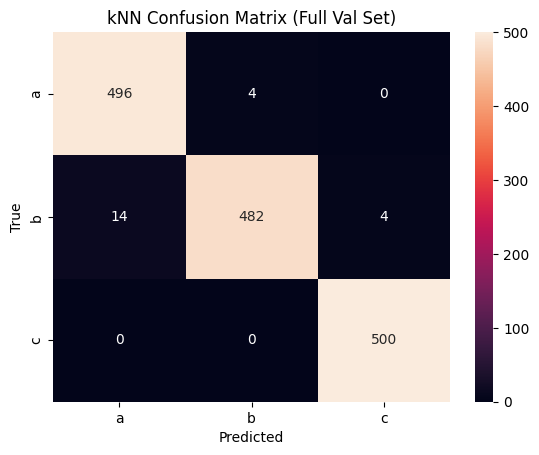

In [24]:
test_rgb = extract_center_rgb("splits/full_val.csv")
X_test = test_rgb[["R", "G", "B"]].values / 255.0
y_test = le.transform(test_rgb["label"])  # Use same LabelEncoder as before

# Predict
test_preds = knn.predict(X_test)

# Metrics
acc = accuracy_score(y_test, test_preds)
print(f"kNN Accuracy on full Val set: {acc:.5f}")
print("Classification Report (Full Val set):")
print(classification_report(y_test, test_preds, target_names=le.classes_,  digits=5))

# Confusion Matrix
cm = confusion_matrix(y_test, test_preds)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("kNN Confusion Matrix (Full Val Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()